In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\REVALLA LOKESH'

In [5]:
df=pd.read_csv("tesla.csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01-07-2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
1,02-07-2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2,03-07-2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
3,06-07-2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
4,07-07-2010,1.093333,1.108667,0.998667,1.053333,1.053333,103825500


In [7]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

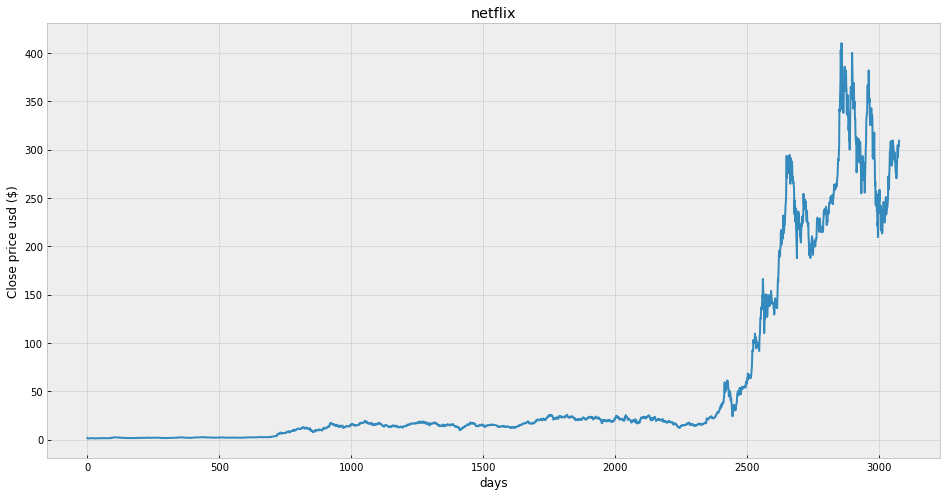

In [8]:
plt.figure(figsize=(16,8))
plt.title('netflix')
plt.xlabel('days')
plt.ylabel('Close price usd ($)')
plt.plot(df['Close'])
plt.show()

In [9]:
df = df[['Close']]
df.head(4)


,Close
0,1.588667
1,1.464000
2,1.280000
3,1.074000


In [10]:
future_days = 25 
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,1.588667,1.363333
1,1.464000,1.306000
2,1.280000,1.306667
3,1.074000,1.268667


In [11]:
x = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(x)

[[  1.588667]
 [  1.464   ]
 [  1.28    ]
 ...
 [294.356659]
 [286.630005]
 [300.029999]]


C:\Users\REVALLA LOKESH\AppData\Local\Temp\ipykernel_25404\1880816686.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [12]:
y =np.array(df['Prediction'])[:-future_days]
print(y)

[  1.363333   1.306      1.306667 ... 303.75     303.350006 309.070007]


In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [14]:
tree=DecisionTreeRegressor().fit(x_train,y_train)
lr=LinearRegression().fit(x_train,y_train)


In [15]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future



C:\Users\REVALLA LOKESH\AppData\Local\Temp\ipykernel_25404\2595257457.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[234.343338],
       [233.070007],
       [237.039993],
       [238.313339],
       [240.066666],
       [240.546661],
       [245.529999],
       [247.5     ],
       [271.706665],
       [272.243347],
       [268.433319],
       [258.859985],
       [274.820007],
       [280.899994],
       [297.149994],
       [297.276672],
       [300.58667 ],
       [307.396667],
       [308.633331],
       [288.170013],
       [290.42334 ],
       [283.333344],
       [294.356659],
       [286.630005],
       [300.029999]])

In [16]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
lr_prediction = lr.predict(x_future)
print(lr_prediction)



[309.320007 283.333344 303.996674 302.869995 296.666656 289.91333
 296.453339 222.643326 296.070007 288.089996 284.820007 277.700012
 275.609985 277.160004 270.209991 274.420013 238.886673 280.07666
 299.679993 304.420013 238.279999 231.243332 217.733337 307.053345
 312.470001]

[236.51979389 235.24715817 239.21497643 240.48762714 242.23999676
 242.71972967 247.7003466  249.66927191 273.86271927 274.39910822
 270.59116062 261.02305398 276.97436128 283.0510284  299.29215536
 299.41876419 302.72695482 309.53323334 310.76922208 290.31707773
 292.56917434 285.48304971 296.50034562 288.77791063 302.17058778]


C:\Users\REVALLA LOKESH\AppData\Local\Temp\ipykernel_25404\445272965.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


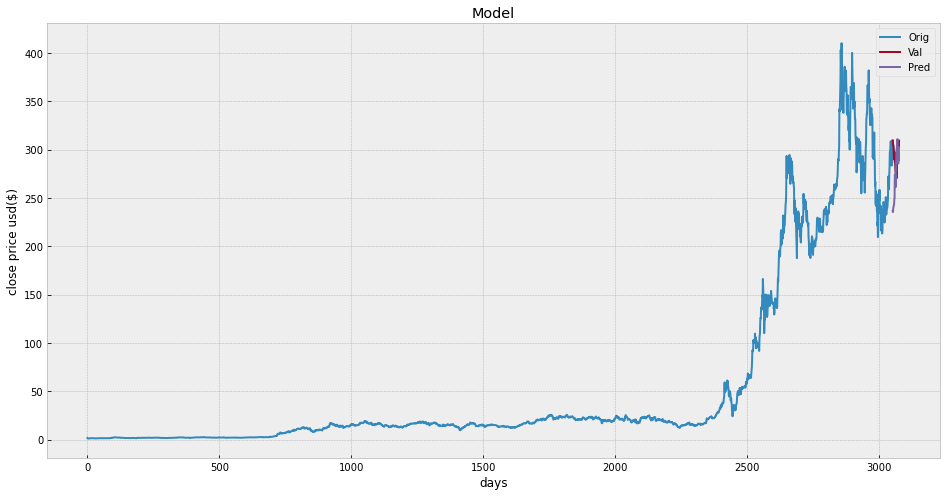

In [17]:
predictions = lr_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('close price usd($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()



C:\Users\REVALLA LOKESH\AppData\Local\Temp\ipykernel_25404\175567456.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


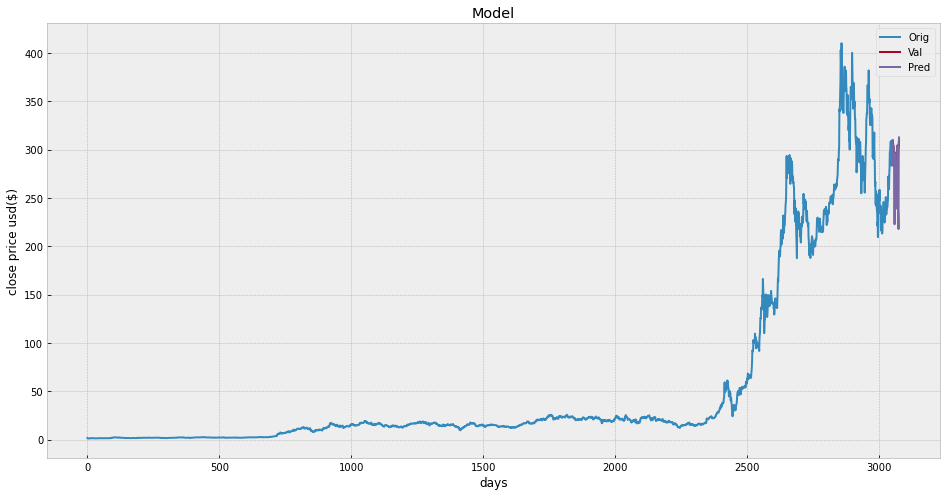

In [18]:
predictions = tree_prediction

valid = df[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('days')
plt.ylabel('close price usd($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val','Pred'])
plt.show()



In [19]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

[309.320007 283.333344 303.996674 302.869995 296.666656 289.91333
 296.453339 222.643326 296.070007 288.089996 284.820007 277.700012
 275.609985 277.160004 270.209991 274.420013 238.886673 280.07666
 299.679993 304.420013 238.279999 231.243332 217.733337 307.053345
 312.470001]

